In [1]:
import sys
sys.path.append("/Users/hhg/Research/kinematic_lensing/repo/kl_measurement/scripts/")

from generate_TFcube import get_TFcube_pars, get_data_TFcube

In [2]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [5]:
update_TF, _ = get_TFcube_pars()
update_TF['g1'] = 0.05
update_TF['sini'] = 0.8 
update_TF['vcirc'] = -200. 


update_TF['n_knots'] = 10.
update_TF['knot_fraction'] = 0.0
update_TF['throughput'] = 0.78
update_TF['slitWidth'] = 0.02
update_TF['psfFWHM'] = 0.5
update_TF['pixScale'] = 0.032

update_TF['redshift'] = 0.2
update_TF['Resolution'] = 5000.
update_TF['nm_per_pixel'] = 0.025
update_TF['expTime'] = 10000.0
update_TF['linelist']['flux'][update_TF['linelist']['species'] == 'Halpha'] = 6.0e-24
update_TF['lambda_min'] = (1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'Halpha'] - 2
update_TF['lambda_max'] = (1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'Halpha'] + 2
update_TF['norm'] = 1e-26
TF_pars, meta_parameters = get_TFcube_pars(update_TF)
data, noise, obslambda = get_data_TFcube(TF_pars, meta_parameters, return_lambda=True)

returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)


In [6]:
# make data_info from Prangal's data output

data_info = {}
data_info['ModelCube'] = None
data_info['ObsCube'] = None
data_info['image'] = data['image']
data_info['image_variance'] = noise['image']

if len(TF_pars['slitAngles']) == 1:
    data_info['data'] = data['spectra'][0]
else:
    data_info['data_list'] = data['spectra']
    
data_info['grid_lambda'] = obslambda

extent =  TF_pars['image_size'] * TF_pars['pixScale']
subGridPixScale = extent*1./TF_pars['ngrid']

data_info['grid_pos']  = np.arange(-extent/2., extent/2., subGridPixScale)
data_info['grid_Image'] = np.arange(-extent/2., extent/2., TF_pars['pixScale'])
data_info['par_fid']   = TF_pars
data_info['lambda_emit'] = 656.461 # Halpha [nm]

In [7]:
TF_pars

{'g1': 0.05,
 'g2': 0.0,
 'sini': 0.8,
 'diskFrac': 1.0,
 'n_knots': 10.0,
 'knot_fraction': 0.0,
 'aspect': 0.2,
 'vcirc': -200.0,
 'sigma_intr': 0.01,
 'redshift': 0.2,
 'half_light_radius': 0.5,
 'vscale': 0.5,
 'r_0': 0.0,
 'V_0': 0.0,
 'linelist': array([('OIIa', 372.7092, 2.e-25), ('OIIb', 372.9875, 2.e-25),
        ('OIIIa', 496.0295, 2.e-25), ('OIIIb', 500.824 , 2.e-25),
        ('Halpha', 656.461 , 6.e-24)],
       dtype=[('species', '<U16'), ('lambda', '<f8'), ('flux', '<f8')]),
 'norm': 1e-26,
 'abs_magnitude': None,
 'image_size': 128,
 'ngrid': 256,
 'psfFWHM': 0.5,
 'psf_g1': 0.0,
 'psf_g2': 0.0,
 'area': 785000.0,
 'pixScale': 0.032,
 'Resolution': 5000.0,
 'lambda_min': array([785.7532]),
 'lambda_max': array([789.7532]),
 'nm_per_pixel': 0.025,
 'gain': 1.0,
 'read_noise': 3.0,
 'throughput': 0.78,
 'expTime': 10000.0,
 'type_of_observation': 'slit',
 'fiber_size': 1.0,
 'fiber_offsets': [[0.0, 0.0],
  [1.0, 0.0],
  [-1.0, 0.0],
  [0.0, 1.0],
  [1.0, 1.0]],
 'slitAngle

In [8]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [10]:
data_info_me = gen_dataInfo_from_tfCube(redshift=0.2, vcirc=-200., sini=0.8, g1=0.05, slitAngles=[0.0])

redshift : 0.2
g1 : 0.05
half_light_radius : 0.5
vcirc : -200.0
sini : 0.8
slitWidth : 0.02
slitAngles : [0.0]


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.485904693603516 (sec)
total getSlitSpectra time: 1.2354953289031982 (sec)


In [11]:
data_info_me['par_fid']

{'g1': 0.05,
 'g2': 0.0,
 'sini': 0.8,
 'diskFrac': 1.0,
 'n_knots': 10.0,
 'knot_fraction': 0.0,
 'aspect': 0.2,
 'vcirc': -200.0,
 'sigma_intr': 0.01,
 'redshift': 0.2,
 'half_light_radius': 0.5,
 'vscale': 0.5,
 'linelist': array([('OIIa', 372.7092, 2.e-25), ('OIIb', 372.9875, 2.e-25),
        ('OIIIa', 496.0295, 2.e-25), ('OIIIb', 500.824 , 2.e-25),
        ('Halpha', 656.461 , 6.e-24)],
       dtype=[('species', '<U16'), ('lambda', '<f8'), ('flux', '<f8')]),
 'norm': 1e-26,
 'abs_magnitude': None,
 'image_size': 128,
 'ngrid': 256,
 'psfFWHM': 0.5,
 'psf_g1': 0.0,
 'psf_g2': 0.0,
 'area': 785000.0,
 'pixScale': 0.032,
 'Resolution': 5000,
 'lambda_min': array([785.7532]),
 'lambda_max': array([789.7532]),
 'nm_per_pixel': 0.025,
 'gain': 1.0,
 'read_noise': 3.0,
 'throughput': 0.78,
 'expTime': 10000.0,
 'type_of_observation': 'slit',
 'fiber_size': 1.0,
 'fiber_offsets': [[0.0, 0.0],
  [1.0, 0.0],
  [-1.0, 0.0],
  [0.0, 1.0],
  [1.0, 1.0]],
 'slitAngles': [0.0],
 'slitWidth': 0.0

In [ ]:
# check image
fig, ax = plt.subplots(1,1, figsize=(2.5,2.5))
ax.contourf(data_info['image'])

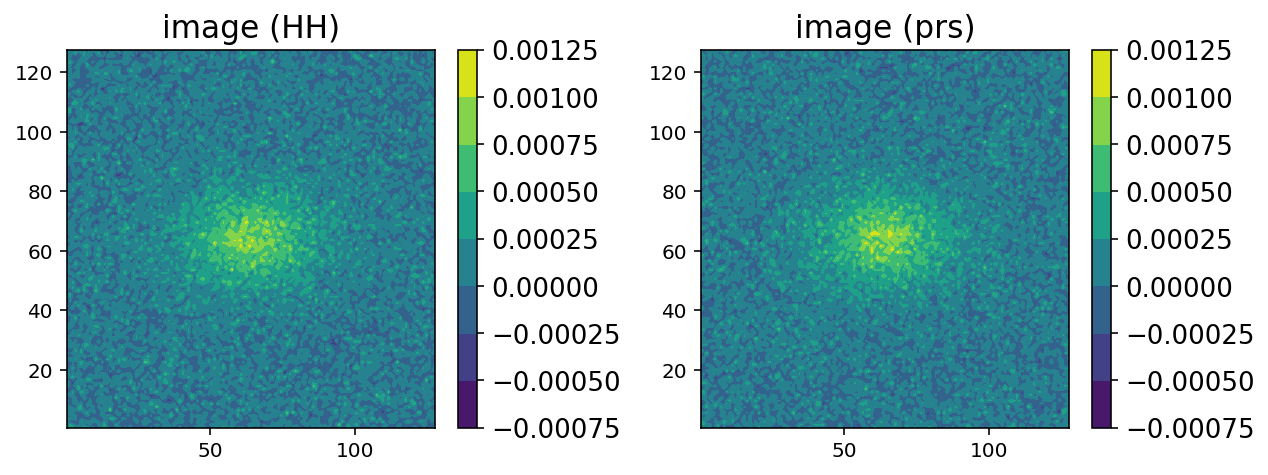

In [16]:
%matplotlib inline

ncol=2

fig,ax = plt.subplots(1,ncol,figsize=(9,3.5))
plt.rc('font',size=13)

img0 = ax[0].contourf(data_info_me['image'],origin="lower")
ax[0].set_title('image (HH)')
fig.colorbar(img0, ax=ax[0])

img1 = ax[1].contourf(data_info['image'],origin="lower")
ax[1].set_title('image (prs)')
fig.colorbar(img1, ax=ax[1])

fig.tight_layout()

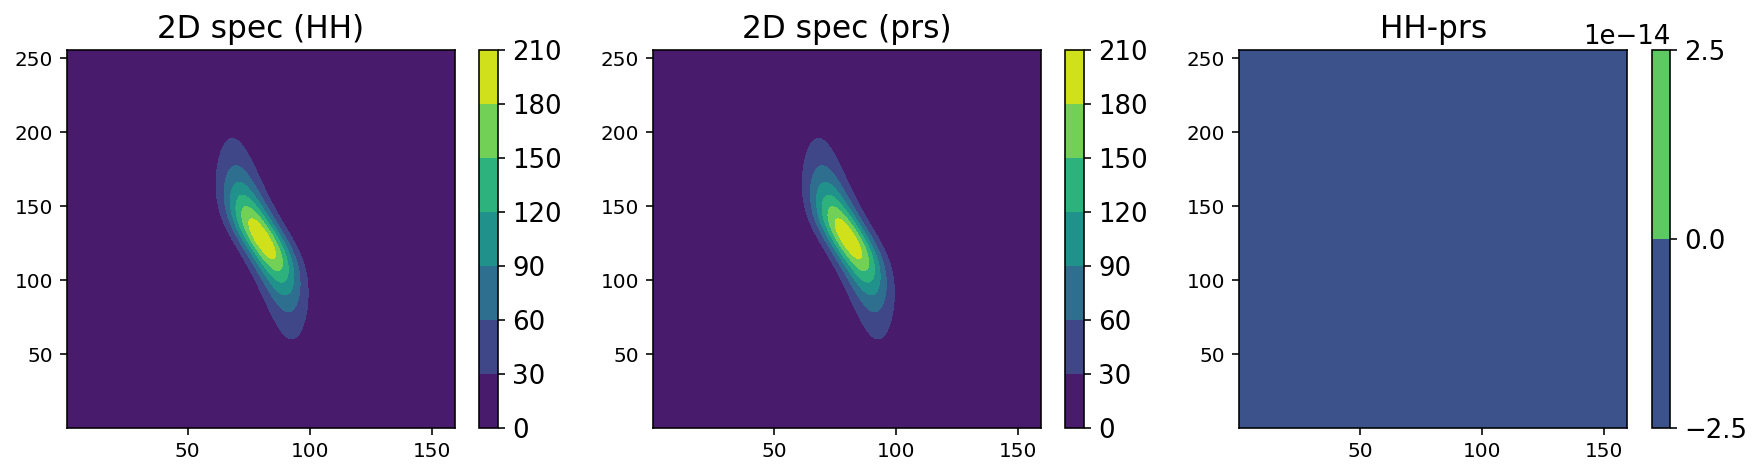

In [25]:
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(12.5,3.5))
plt.rc('font',size=13)

img0 = ax[0].contourf(data_info_me['data'],origin="lower")
ax[0].set_title('2D spec (HH)')
fig.colorbar(img0, ax=ax[0])

img1 = ax[1].contourf(data_info['data'],origin="lower")
ax[1].set_title('2D spec (prs)')
fig.colorbar(img1, ax=ax[1])

img2 = ax[2].contourf(data_info_me['data']-data_info['data'],origin="lower")
ax[2].set_title('HH-prs')
fig.colorbar(img2, ax=ax[2])

fig.tight_layout()